# Tweets by Members of the European Parliament

This jupyter Notebook consists the third project assigned by Associate Professor Panos Louridas for the course Applied Machine Learning at the 7th Semester in the Department of Management Science and Technology (DMST) of the Athens University of Economics and Business (AUEB).

> Department of Management Science and Technology <br/>
> Konstantinos Babetas 8160078  <br/>
> kbabetas@gmail.com <br/>
> Github: [kbabetas](https://github.com/kbabetas) <br/>
> LinkedIn: [kbabetas](https://www.linkedin.com/in/kbabetas/)

### Data

The data that we will be using can be found [here](https://www.clarin.si/repository/xmlui/handle/11356/1071) and we will be using the `retweets.csv` file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 10]

In [3]:
data_filename = 'retweets.csv'
data = pd.read_csv(data_filename)

### 1. Data Preparation


* Keep only the records for which the language of the original tweet is in English.

* Get the text of the *original tweet* and add it to the dataset as an extra column. Use the Tweeter API to get the text (e.g., with Tweepy). In order not to run into rate limits you can ask for multiple tweets with one call.

* Keep only the records for which you were able to download the tweet text.

* Group the records by the European group of the MEP that posted the original tweet. If you see that there are groups with very few tweets (less than 50), drop them. 

_____________________________________________________________________________________________________

In [4]:
data

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang
0,249601317,papadimoulis,28586,Dimitrios PAPADIMOULIS,0,GUE-NGL,11,GRC,33248043,EvaKaili,...,Eva KAILI,1,S&D,11,GRC,Tue Nov 01 12:11:39 +0000 2011,131342637201506304,Sat Jun 27 14:17:28 +0000 2015,614799711309012992,el
1,249601317,papadimoulis,28586,Dimitrios PAPADIMOULIS,0,GUE-NGL,11,GRC,33248043,EvaKaili,...,Eva KAILI,1,S&D,11,GRC,Sun Feb 05 07:45:30 +0000 2012,166064894725206017,Wed Jun 17 12:04:06 +0000 2015,611142270809731072,el
2,217749896,MLP_officiel,28210,Marine LE PEN,7,ENL,9,FRA,498983436,SteeveBriois,...,Steeve BRIOIS,7,ENL,9,FRA,Sun Mar 25 14:47:16 +0000 2012,183928038675849216,Tue Nov 24 09:58:19 +0000 2015,669092676000686080,fr
3,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en
4,217749896,MLP_officiel,28210,Marine LE PEN,7,ENL,9,FRA,3065992036,DominiqueBilde,...,Dominique BILDE,7,ENL,9,FRA,Wed May 15 17:43:25 +0000 2013,334725721853407232,Mon May 25 12:36:41 +0000 2015,602815550473904128,fr
5,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,Nathan GILL,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en
6,599491010,EugenAFreund,125018,Eugen FREUND,1,S&D,0,AUT,862795896,jleichtfried,...,Jörg LEICHTFRIED,1,S&D,0,AUT,Sun Sep 15 10:14:42 +0000 2013,379186507061268480,Fri May 15 19:12:22 +0000 2015,599291246608306176,de
7,202086424,AndrzejDuda,124899,Andrzej DUDA,5,ECR,20,POL,357514379,ZbigniewKuzmiuk,...,Zbigniew KUŹMIUK,5,ECR,20,POL,Thu Sep 26 15:05:58 +0000 2013,383246071461588992,Wed May 06 20:29:53 +0000 2015,596049266780549121,pl
8,158342368,Pablo_Iglesias_,125031,Pablo IGLESIAS,0,GUE-NGL,25,ESP,392199690,MiguelUrban,...,Miguel URBÁN CRESPO,0,GUE-NGL,25,ESP,Tue Dec 24 20:13:32 +0000 2013,415575991462162432,Thu Dec 24 20:27:23 +0000 2015,680122618935115779,es
9,1875717132,ZahradilJan,23712,Jan ZAHRADIL,5,ECR,5,CZE,2396056585,JezekCZ,...,Petr JEŽEK,3,ALDE,5,CZE,Fri Apr 04 05:00:09 +0000 2014,451947306338635776,Thu Mar 12 05:37:13 +0000 2015,575893284939259904,sk


### Data Preparation

Let's get the easy stuff done first.

We can easily select to work with only the english tweets.

In [5]:
data = data.loc[data.lang == 'en']
retweets = data
retweets = retweets.reset_index()
del retweets['index']
retweets

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,Nathan GILL,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,Marita ULVSKOG,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,...,Nigel FARAGE,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en
5,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,Ian DUNCAN,5,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en
6,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,...,Roger HELMER,6,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en
7,209020126,paulnuttallukip,96805,Paul NUTTALL,6,EFDD,27,GBR,3242161976,LouiseBoursUKIP,...,Louise BOURS,6,EFDD,27,GBR,Fri Sep 12 10:52:06 +0000 2014,510380324636073984,Thu Jun 11 11:14:51 +0000 2015,608955548017369088,en
8,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,...,James CARVER,6,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en
9,454779231,catherinemep,96955,Catherine BEARDER,3,ALDE,27,GBR,351009963,DavidCoburnUKip,...,David COBURN,6,EFDD,27,GBR,Thu Sep 25 09:56:24 +0000 2014,515077347645870080,Sat Oct 04 12:26:40 +0000 2014,518376655963033600,en


Then we need to create a connection with the Twitter API and we will use tweepy to help us with that matter.

In order to set up your connection with tweepy you can learn more at [Associate Professor Panos Louridas' guide](https://drive.google.com/drive/folders/0B26_NyylDb8qbm1uQ01LeTliWEU)

In [6]:
import tweepy

from twitter_config import config

auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [7]:
tweets_id = retweets.loc[:,['origTweetId'] ]
tweets_id

,origTweetId
0,220473289259233285
1,353060776707235841
2,467647542378123264
3,471694322472353793
4,471694322472353793
5,486509184708792320
6,500600838419935232
7,510380324636073984
8,512257283087429632
9,515077347645870080


In [8]:
tweets_text = pd.DataFrame(columns=['origTweetId', 'tweetText'])
tweets_text



,origTweetId,tweetText


Now that we have established a connection with the API we can create our function that will bring us the texts of all the tweets.

Since they are a lot and to avoid running into rate limits, we will use statuses_lookup to do it in a faster and more efficient way.

In [9]:
def lookup_tweets(tweet_IDs, api):
    full_tweets = []
    tweet_count = len(tweet_IDs)
    try:
        for i in range(int(tweet_count / 100) + 1):
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id_ = tweet_IDs[i * 100:end_loc])
            )
        return full_tweets
    except tweepy.TweepError:
        print ('TweepError')

In [10]:
ids = retweets['origTweetId'].values.tolist()

In [11]:
full_tweets = lookup_tweets(ids,api)

In [12]:
tweet_id = []
texts = []

In [13]:
for i in range(len(full_tweets)):
    tweets_text['origTweetId'], tweets_text['tweetText'] = full_tweets[i].id, full_tweets[i].text
    tweet_id.append(full_tweets[i].id)
    texts.append(full_tweets[i].text)


Now we have all the texts from all the tweets.

By playing around we can see that many tweets include links, which are not helpful to us and we can play around a bit with the texts before moving on.

We certainly can do all of this later, but it is nice doing it now and not worrying about it later.

We also lemmatize all the worlds since we do not want to differentiate to that extent the words of the tweets.

In [14]:
import re
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for i in range(len(texts)):
    text = texts[i]
    text = re.sub('http\S+', '', texts[i])
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.lower()

    text = text.split()

    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    texts[i] = text


In [15]:
tweets_text['origTweetId'], tweets_text['tweetText'] =  tweet_id, texts

Now that we have put the texts in a datframe we can merge with our initial dataframe and start working on it!

In [16]:
tweets_text

,origTweetId,tweetText
0,519050739642286080,lord hill's written answer to ep are now on my...
1,519139901359783936,our @sebdance asks @abratusek about global cli...
2,518024241024073728,i write for @labourlist tory threat to court o...
3,519109106272317440,"“@ashleyfoxmep: and named her party ""the allia..."
4,518721908951769088,good luck to @theprogressives in bulgaria toda...
5,517735072754302976,a ep doe not provide coffee in meeting commiss...
6,500600838419935232,robert halfon raising issue of illegal travell...
7,518093050267332608,"read my latest #farageonfriday, cameron's spee..."
8,517723618999283713,letter sent today with @marietjeschaake demand...
9,517679694544904192,my summary for #bienkowska: competent. #ephear...


In [17]:
tweets = pd.merge(retweets, tweets_text, how='left', on='origTweetId', indicator='exists')
tweets = tweets.loc[tweets.exists == 'both']
tweets

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,tweetText,exists
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,euro parliament vote overwhelmingly to reject ...,both
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"u have one currency, one central bank and one ...",both
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,more job for young people is my top priority f...,both
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"vote #labour, get tory. vote tory, get labour....",both
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"vote #labour, get tory. vote tory, get labour....",both
5,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,answering my question in ecr group j-c juncker...,both
6,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,...,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en,robert halfon raising issue of illegal travell...,both
8,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,...,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en,"ignore the labour lies, this is where #ukip st...",both
9,454779231,catherinemep,96955,Catherine BEARDER,3,ALDE,27,GBR,351009963,DavidCoburnUKip,...,EFDD,27,GBR,Thu Sep 25 09:56:24 +0000 2014,515077347645870080,Sat Oct 04 12:26:40 +0000 2014,518376655963033600,en,next week i'll be grilling eu commissioner can...,both
10,478679663,Steven_Woolfe,124966,Steven WOOLFE,6,EFDD,27,GBR,158021529,oflynnmep,...,EFDD,27,GBR,Tue Sep 30 12:11:36 +0000 2014,516923314225553409,Tue Oct 07 14:45:26 +0000 2014,519498741850836993,en,#migration can be positive for the uk - only i...,both


Let's see how many tweets each MEP group has posted. 

We do not care for groups that made less than 50 tweets so we will get rid of those.

In [18]:
agg_tweets = tweets.groupby('origMepGroupId')['origMepGroupShort'].agg(['count'])
agg_tweets

,count
origMepGroupId,
0,356
1,3060
2,1199
3,1868
4,2112
5,1102
6,3283
7,23
8,1


In [19]:
to_drop = agg_tweets.loc[agg_tweets['count'] < 50]
del to_drop['count']
to_drop

""
origMepGroupId
7
8


In [20]:
tweets = tweets[tweets['origMepGroupId'] != 7]
tweets = tweets[tweets['origMepGroupId'] != 8]
tweets

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,tweetText,exists
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,euro parliament vote overwhelmingly to reject ...,both
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"u have one currency, one central bank and one ...",both
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,more job for young people is my top priority f...,both
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"vote #labour, get tory. vote tory, get labour....",both
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"vote #labour, get tory. vote tory, get labour....",both
5,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,answering my question in ecr group j-c juncker...,both
6,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,...,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en,robert halfon raising issue of illegal travell...,both
8,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,...,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en,"ignore the labour lies, this is where #ukip st...",both
9,454779231,catherinemep,96955,Catherine BEARDER,3,ALDE,27,GBR,351009963,DavidCoburnUKip,...,EFDD,27,GBR,Thu Sep 25 09:56:24 +0000 2014,515077347645870080,Sat Oct 04 12:26:40 +0000 2014,518376655963033600,en,next week i'll be grilling eu commissioner can...,both
10,478679663,Steven_Woolfe,124966,Steven WOOLFE,6,EFDD,27,GBR,158021529,oflynnmep,...,EFDD,27,GBR,Tue Sep 30 12:11:36 +0000 2014,516923314225553409,Tue Oct 07 14:45:26 +0000 2014,519498741850836993,en,#migration can be positive for the uk - only i...,both


### Duplicates

We will also remove any duplicates from our dataframe so as to not affect the results of our calculations.

#### Disclaimer - Assumptions

We can see that we have several tweets have the same Original TweetID which means that they have been retweeted.

And then we have two possible situations. We have retweets that have a different text, so maybe one political figure had something to comment on the original tweet. We certainly do not want to get rid of those.

The alternative is that the text of the retweet is exactly the same, which is usually seen when people from the same political group agree with the original tweet and want to emphasize that.

So we need to decide what we are going to do with our second category.

After careful consideration we decided to keep those retweets. 
The main reason behind it is that we assume that the text and the words being used are characterizing the groups as they all pretty much support the same things (within the group).
So the words used by one member, can and are used by others as well. Also, we believe that if the original tweet didn't exist or if the retweet option was unavailable the political members would still want to express their opinion and would do in a similar manner, so it does not make sense to remove these.

However, at the end of this assignment we will take a brief look at how our results would have changed had we chosen to move forward with the removal of the retweeted tweets.

In [21]:
tweets = tweets.drop_duplicates()
tweets

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,tweetText,exists
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,euro parliament vote overwhelmingly to reject ...,both
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"u have one currency, one central bank and one ...",both
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,more job for young people is my top priority f...,both
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"vote #labour, get tory. vote tory, get labour....",both
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,...,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"vote #labour, get tory. vote tory, get labour....",both
5,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,answering my question in ecr group j-c juncker...,both
6,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,...,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en,robert halfon raising issue of illegal travell...,both
8,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,...,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en,"ignore the labour lies, this is where #ukip st...",both
9,454779231,catherinemep,96955,Catherine BEARDER,3,ALDE,27,GBR,351009963,DavidCoburnUKip,...,EFDD,27,GBR,Thu Sep 25 09:56:24 +0000 2014,515077347645870080,Sat Oct 04 12:26:40 +0000 2014,518376655963033600,en,next week i'll be grilling eu commissioner can...,both
10,478679663,Steven_Woolfe,124966,Steven WOOLFE,6,EFDD,27,GBR,158021529,oflynnmep,...,EFDD,27,GBR,Tue Sep 30 12:11:36 +0000 2014,516923314225553409,Tue Oct 07 14:45:26 +0000 2014,519498741850836993,en,#migration can be positive for the uk - only i...,both


Now that we have removed the simple duplicates it is wise to check again the counts so that nothing has changed dramatically before moving on to the clustering

In [22]:
agg_tweets = tweets.groupby('origMepGroupId')['origMepGroupShort'].agg(['count'])
agg_tweets

,count
origMepGroupId,
0,353
1,3039
2,1195
3,1854
4,2104
5,1102
6,3261


## 2. Clustering

* Use k-means to cluster the tweets based on their text.

* The tweet texts must be converted to a format suitable for k-means, bag of word matrices or tf-idf matrices.

  * That means that you will need to use a [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) or a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). 
  
  * You may want to strip accents, and convert everything to lowercase. 
  
  * Use `min_df=10` and `max_df=0.50`.
  
  * Remove all English stopwords.
  
  * You may experiment with additional ideas about how best to tokenize etc.

* Use both the elbow method and the silhouette score to investigate the best number of clusters. Settle on the best number of clusters. 

* Visualize the clusters using Yellowbrick's [InterclusterDistance](https://www.scikit-yb.org/en/latest/api/cluster/icdm.html).
  
* Then, investigate the clusters by finding the most important features in each cluster. To do that, you will find the cluster center of each cluster, get the top $k$ dimensions (for $k$ say 10, 20, 30, ..., your choice) and print them out. The top $k$ dimensions are the $k$ dimensions with the biggest value in the cluster center. Do they make any sense?

________________________________________________________________________________________________________________________________________________________________________________

We will be using the CountVectorizer for our clustering

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [191]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(#max_features=1500,
                                strip_accents='unicode',
                                lowercase=True,
                                max_df=0.50, 
                                min_df=10,
                                token_pattern = r'(\b[a-zA-Z]{3,}\b)',
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(tweets.tweetText)
X = tf.toarray()
print("done in %0.3fs." % (time() - t0))
print(tf.shape)

Extracting tf features for LDA...
done in 0.240s.
(12908, 2169)


We check what our Vectorizer did so that we can confirm that we have what we need to go through with the clustering

In [25]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
print('Non-sparse array', end='\n\n')
print(tf.toarray(), end='\n\n')

print('CSR array')
print()
print('data: ', tf.data)
print('indptr: ', tf.indptr)
print('indices ', tf.indices)

Non-sparse array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

CSR array

data:  [1 1 1 ... 2 1 1]
indptr:  [    0    10    16 ... 91007 91012 91015]
indices  [2020 1571   46 ...  180  540 2140]


In [27]:
tf_vectorizer.get_feature_names()

['abduction',
 'able',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accession',
 'according',
 'account',
 'accountability',
 'achieve',
 'achievement',
 'act',
 'acting',
 'action',
 'actions',
 'activist',
 'actually',
 'add',
 'address',
 'addressing',
 'admits',
 'adopt',
 'adopted',
 'advance',
 'advice',
 'affair',
 'affected',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agrees',
 'agriculture',
 'agst',
 'ahead',
 'aid',
 'aids',
 'air',
 'akhanmep',
 'alan',
 'alde',
 'aldecongress',
 'aldegroup',
 'aldeparty',
 'allianceecr',
 'allow',
 'allowance',
 'allowed',
 'allowing',
 'ally',
 'alongside',
 'alternative',
 'amazing',
 'ambassador',
 'ambition',
 'ambitious',
 'amendment',
 'american',
 'amjadbashirmep',
 'amp',
 'anagomesmep',
 'analysis',
 'andrew',
 'angela',
 'angelikamlinar',
 'aniebler',
 'animal',
 'ankara',
 'ankarabombing',
 'annah

In [28]:
tf_vectorizer.vocabulary_

{'euro': 652,
 'parliament': 1393,
 'vote': 2078,
 'reject': 1604,
 'commission': 342,
 'say': 1704,
 'press': 1485,
 'ahead': 46,
 'reason': 1571,
 'ukip': 2020,
 'currency': 431,
 'central': 273,
 'bank': 151,
 'govt': 839,
 'europe': 657,
 'like': 1139,
 'job': 1042,
 'young': 2164,
 'people': 1417,
 'priority': 1493,
 'sweden': 1900,
 'labour': 1087,
 'tory': 1975,
 'question': 1541,
 'ecr': 578,
 'group': 856,
 'juncker': 1059,
 'confirmed': 369,
 'post': 1466,
 'chief': 298,
 'presidency': 1483,
 'raising': 1556,
 'issue': 1021,
 'illegal': 945,
 'called': 241,
 'ignore': 943,
 'stand': 1835,
 'nhs': 1328,
 'week': 2108,
 'commissioner': 343,
 'candidate': 252,
 'environment': 625,
 'ask': 112,
 'migration': 1257,
 'positive': 1464,
 'really': 1570,
 'good': 832,
 'presentation': 1481,
 'hill': 900,
 'ready': 1567,
 'keen': 1069,
 'listen': 1147,
 'hungary': 936,
 'model': 1277,
 'countries': 408,
 'intelligence': 985,
 'lord': 1162,
 'ill': 944,
 'response': 1637,
 'work': 2140,

In [29]:
analyze = tf_vectorizer.build_analyzer()
analyze(tweets.tweetText[9])

['week',
 'grilling',
 'commissioner',
 'candidate',
 'environment',
 'ask',
 'askteamjuncker']

In [30]:
tweets.tweetText[4]

'vote #labour, get tory. vote tory, get labour. vote #ukip get ukip'

Now that we have seen what our vectorizer has done and since we are satisfied with the results we can move to the actual clustering.

We know that we have 7 MEP Groups so let's first run a KMeans with 7 Clusters.

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(tf)
kmeans.cluster_centers_

array([[0.        , 0.00304878, 0.        , ..., 0.0152439 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00106496, ..., 0.        , 0.        ,
        0.00106496],
       [0.00022624, 0.00260181, 0.00147059, ..., 0.00045249, 0.00056561,
        0.0020362 ],
       ...,
       [0.        , 0.00248756, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00211416, 0.00493305, 0.        , ..., 0.00140944, 0.00140944,
        0.00070472],
       [0.00759494, 0.00379747, 0.        , ..., 0.        , 0.00379747,
        0.00253165]])

In [32]:
labels = kmeans.fit_predict(tf)
np.array_equal(labels, kmeans.labels_)

True

It's not that easy to decide just like that so let's create an elbow plot.

We see that the optimal k for this dataset according to the plot below is 6 and it makes pretty good sense as we previously said 7 and if we check again the data the 7th group has made significantly less tweets than the others, so it can not differentiate itself from the others that much.

We also see that the difference between 4 and 6 clusters is not that substantial.

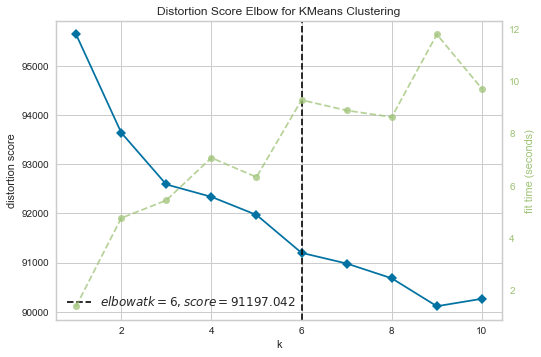

In [33]:

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(tf)
visualizer.show()

Unfortunately the silhouette score has not given us a similar output to the elbow plot.
We quickly disregard the 2 clusters.
However the fact that the second best is 4 clusters is more close to what our elbow plot showed. And since the difference in the silhouette score between 4 and 6 is more substantial, in contrast to what we saw at the elbow plot, we will move on with 4 clusters.

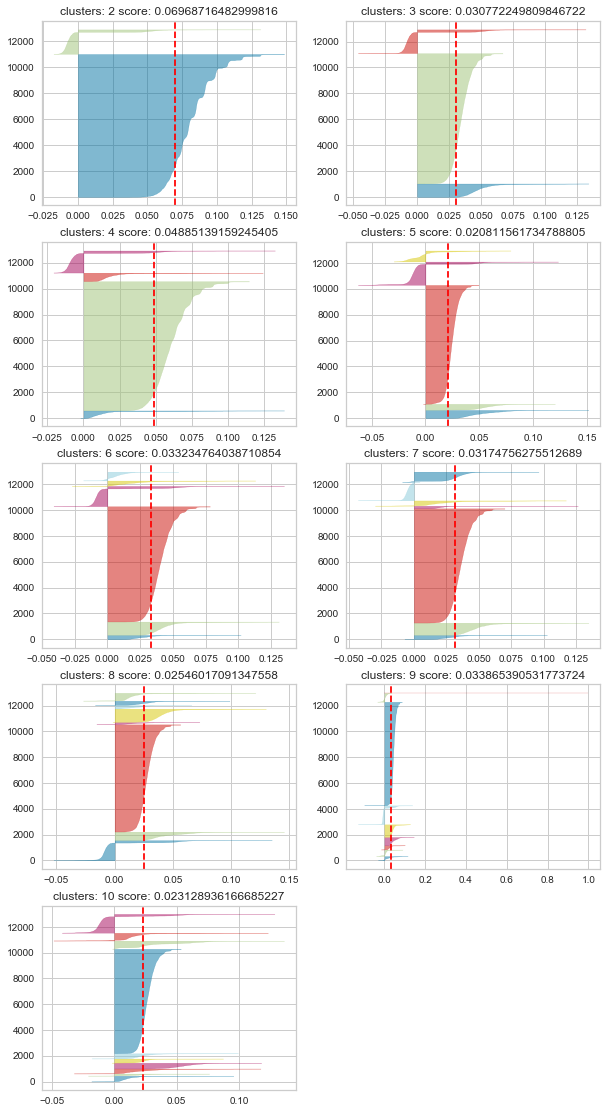

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 11):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(tf)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [35]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.06968716482999816),
 (4, 0.04885139159245405),
 (9, 0.033865390531773724),
 (6, 0.033234764038710854),
 (7, 0.03174756275512689),
 (3, 0.030772249809846722),
 (8, 0.02546017091347558),
 (10, 0.023128936166685227),
 (5, 0.020811561734788805)]

In [215]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(tf)

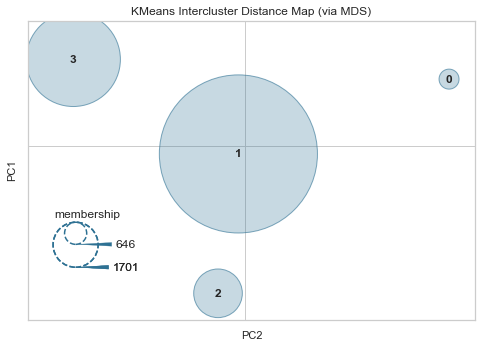

In [37]:
from yellowbrick.cluster import InterclusterDistance
in_visualizer = InterclusterDistance(kmeans)

in_visualizer.fit(tf)
in_visualizer.show()

In [38]:
in_visualizer.scores_

array([ 586, 9975,  646, 1701], dtype=int64)

In [113]:
cl_centers = in_visualizer.cluster_centers_
cl_centers

array([[0.        , 0.00682594, 0.        , ..., 0.        , 0.        ,
        0.00170648],
       [0.00070175, 0.00250627, 0.00140351, ..., 0.00080201, 0.00080201,
        0.00200501],
       [0.00154799, 0.00773994, 0.        , ..., 0.00154799, 0.        ,
        0.        ],
       [0.00235156, 0.00117578, 0.        , ..., 0.00117578, 0.00117578,
        0.00117578]])

In [40]:
centers = pd.DataFrame.from_records(in_visualizer.cluster_centers_).T
centers

,0,1,2,3
0,0.000000,0.000702,0.001548,0.002352
1,0.006826,0.002506,0.007740,0.001176
2,0.000000,0.001404,0.000000,0.000000
3,0.000000,0.001805,0.003096,0.000000
4,0.000000,0.000902,0.000000,0.000588
5,0.000000,0.002005,0.000000,0.002939
6,0.000000,0.002907,0.000000,0.002939
7,0.000000,0.001303,0.000000,0.000000
8,0.005119,0.001404,0.003096,0.000000
9,0.003413,0.004211,0.003096,0.004115


In [202]:
word_finder = tf_vectorizer.get_feature_names()


In [209]:
cl0 = centers.nlargest(10, [0])
cl0

,0,1,2,3
2078,1.121160,0.000000,0.017028,0.008818
2020,0.196246,0.090927,0.015480,0.043504
2008,0.143345,0.030777,0.009288,0.045855
71,0.127986,0.000000,0.171827,1.115814
1247,0.100683,0.032782,0.018576,0.054086
1087,0.097270,0.033684,0.015480,0.042328
1963,0.088737,0.065664,0.047988,0.060553
1393,0.076792,0.031679,0.018576,0.029394
658,0.064846,0.059048,0.038700,0.054674
460,0.061433,0.031880,0.017028,0.041740


In [222]:
cl0 = centers.nlargest(10, [0]) 
cl0 = cl0.loc[:, [0]]
p = cl0.index
cluster_0 = []
for i in p:
    cluster_0.append(word_finder[i])

In [223]:
cl1 = centers.nlargest(10, [1]) 
cl1 = cl1.loc[:, [1]]
p = cl1.index
cluster_1 = []
for i in p:
    cluster_1.append(word_finder[i])

In [224]:
cl2 = centers.nlargest(10, [2]) 
cl2 = cl2.loc[:, [2]]
p = cl2.index
cluster_2 = []
for i in p:
    cluster_2.append(word_finder[i])

In [225]:
cl3 = centers.nlargest(10, [3]) 
cl3 = cl3.loc[:, [3]]
p = cl3.index
cluster_3 = []
for i in p:
    cluster_3.append(word_finder[i])

In [226]:
feat = {'Cluster 0' : cluster_0,
       'Cluster 1' : cluster_1,
       'Cluster 2' : cluster_2,
       'Cluster 3' : cluster_3}

In [227]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(feat)


{'Cluster 0': ['vote',
               'ukip',
               'ttip',
               'amp',
               'meps',
               'labour',
               'today',
               'parliament',
               'european',
               'debate'],
 'Cluster 1': ['ukip',
               'today',
               'european',
               'eppgroup',
               'people',
               'great',
               'support',
               'right',
               'need',
               'just'],
 'Cluster 2': ['europe',
               'amp',
               'eppgroup',
               'need',
               'people',
               'say',
               'change',
               'greece',
               'today',
               'want'],
 'Cluster 3': ['amp',
               'eppgroup',
               'good',
               'today',
               'meeting',
               'european',
               'meps',
               'need',
               'right',
               'ttip']}


## Do these results make sense?

Yes they do. 

Let's go backwards.
We can see that the Cluster 3 focuses in the Annual Management Plan (amp) and the European's People Party (EPPGroup) meeting that went well.

The cluster 2 has a strong focus on what changes europe and, in fact, Greece want and need

The cluster 1 focuses more on the UK Independent party (ukip) and on the European's People Party (EPPGroup) that need support

The cluster 0 focuses on the vote of the several members and parties

## 3. Classification

* Train at least two algorithms to learn to classify an unseen tweet. The target variable should be the political party of the original poster and the training features should be the original tweet's text.

* You should split your data to training and testing datasets, try the different algorithms with cross validation on the training dataset, and find the best hyperparameters for the best algorithm. The best hyperparameters for the construction of the bag of words or tf-idf matrices for classification are not necessarily the same with those you used for k-means.

* Report your scores; once you find the best algorithm and the best hyperparameters, report the score on the test data.

* To gauge the efficacy of the algorithm, report also the results of a baseline classifier, using, for instance, scikit-learn's [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

____________________________________________________________________________________________________________________________________________

First, we will use the tf-idf metric to help us with our classification

In [166]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
tf = tfidfconverter.fit_transform(tf)
X = tfidfconverter.fit_transform(X).toarray()

## Split into training and testing

It is time to split our data into training and testing so we can run our classification

In [42]:
cl_tweets = tweets.loc[:, ['origMepGroupId', 'origMepGroupShort', 'tweetText' ]]
cl_tweets

,origMepGroupId,origMepGroupShort,tweetText
0,6,EFDD,euro parliament vote overwhelmingly to reject ...
1,1,S&D,"u have one currency, one central bank and one ..."
2,1,S&D,more job for young people is my top priority f...
3,6,EFDD,"vote #labour, get tory. vote tory, get labour...."
4,6,EFDD,"vote #labour, get tory. vote tory, get labour...."
5,5,ECR,answering my question in ecr group j-c juncker...
6,6,EFDD,robert halfon raising issue of illegal travell...
8,6,EFDD,"ignore the labour lies, this is where #ukip st..."
9,3,ALDE,next week i'll be grilling eu commissioner can...
10,6,EFDD,#migration can be positive for the uk - only i...


In [43]:
cl_text = cl_tweets.loc[:, ['tweetText']]
cl_text

,tweetText
0,euro parliament vote overwhelmingly to reject ...
1,"u have one currency, one central bank and one ..."
2,more job for young people is my top priority f...
3,"vote #labour, get tory. vote tory, get labour...."
4,"vote #labour, get tory. vote tory, get labour...."
5,answering my question in ecr group j-c juncker...
6,robert halfon raising issue of illegal travell...
8,"ignore the labour lies, this is where #ukip st..."
9,next week i'll be grilling eu commissioner can...
10,#migration can be positive for the uk - only i...


In [44]:
cl_groupId = cl_tweets.loc[:, ['origMepGroupId']]
cl_groupId

,origMepGroupId
0,6
1,1
2,1
3,6
4,6
5,5
6,6
8,6
9,3
10,6


In [45]:
zzz = cl_tweets.drop_duplicates()
zzz

,origMepGroupId,origMepGroupShort,tweetText
0,6,EFDD,euro parliament vote overwhelmingly to reject ...
1,1,S&D,"u have one currency, one central bank and one ..."
2,1,S&D,more job for young people is my top priority f...
3,6,EFDD,"vote #labour, get tory. vote tory, get labour...."
5,5,ECR,answering my question in ecr group j-c juncker...
6,6,EFDD,robert halfon raising issue of illegal travell...
8,6,EFDD,"ignore the labour lies, this is where #ukip st..."
9,3,ALDE,next week i'll be grilling eu commissioner can...
10,6,EFDD,#migration can be positive for the uk - only i...
11,6,EFDD,"""vote ukip, get labour"" say dave. really...?"


In [46]:
cl_tweets.origMepGroupId.unique()

array([6, 1, 5, 3, 4, 2, 0], dtype=int64)

In [47]:
y = cl_groupId['origMepGroupId'].to_numpy()
y


array([6, 1, 1, ..., 1, 1, 5], dtype=int64)

In [48]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now that we have splitted our data we can start training our algorithms.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Random Forest Classifier

How does the algorithm work?
It works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred = classifier.predict(X_test)

We see that we predicted our testing data with an accuracy of ~ 70%

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 33  21   1   1   4   2  10]
 [  3 444   8  25  26  10  82]
 [  0  54 132  13  16   7  25]
 [  0  57  17 249  35  14  30]
 [  1  59  11  25 318   6  23]
 [  0  48   4  14  11  91  51]
 [  0  32   4  10   6   9 540]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.61        72
           1       0.62      0.74      0.68       598
           2       0.75      0.53      0.62       247
           3       0.74      0.62      0.67       402
           4       0.76      0.72      0.74       443
           5       0.65      0.42      0.51       219
           6       0.71      0.90      0.79       601

    accuracy                           0.70      2582
   macro avg       0.73      0.63      0.66      2582
weighted avg       0.71      0.70      0.69      2582

0.6998450813323005




With the pickle we can save each model so as to use it later

In [53]:
import pickle
with open('randomForest_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [54]:
with open('randomForest_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [55]:
y_pred2 = model.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2)) 

[[ 33  21   1   1   4   2  10]
 [  3 444   8  25  26  10  82]
 [  0  54 132  13  16   7  25]
 [  0  57  17 249  35  14  30]
 [  1  59  11  25 318   6  23]
 [  0  48   4  14  11  91  51]
 [  0  32   4  10   6   9 540]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.61        72
           1       0.62      0.74      0.68       598
           2       0.75      0.53      0.62       247
           3       0.74      0.62      0.67       402
           4       0.76      0.72      0.74       443
           5       0.65      0.42      0.51       219
           6       0.71      0.90      0.79       601

    accuracy                           0.70      2582
   macro avg       0.73      0.63      0.66      2582
weighted avg       0.71      0.70      0.69      2582

0.6998450813323005


In [56]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred2 = rf_clf.predict(X_test)
print(accuracy_score(y_test, y_pred2))

0.6998450813323005


By conducting a GridSearch and a cross validation on our RandomForestClassifier we get these results:

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3, None],
            'n_estimators': (10, 30, 50, 100, 200, 400, 600, 800, 1000, 1200, 1500, 2000),
             }
gs_clf = GridSearchCV(rf_clf, parameters, n_jobs=-1, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)
gs_clf.best_params_

{'max_depth': None, 'n_estimators': 200}

In [58]:
from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0)
randomForest_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
randomForest_scores

array([0.55069659, 0.56600852, 0.53834237, 0.53273925, 0.53413499])

In [118]:
print(np.mean(randomForest_scores))

0.5265725511756172


In [62]:
with open('rf_clf_cross_val', 'wb') as picklefile:
    pickle.dump(rf_clf,picklefile)

In [63]:
with open('rf_clf_cross_val', 'rb') as rf_clf_cross_val_training_model:
    rf_clf_cross_val_model = pickle.load(rf_clf_cross_val_training_model)

We will now use a naive Bayes classifier to see if we can predict better than the RandomForest Classifier

In [64]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB().fit(X_train, y_train)

In [65]:
y_pred = mnb_clf.predict(X_test)

Our prediction reached 63% accuracy, which is good, but lower than what we got from the RandomForest Classifier

In [66]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 13  29   2  11   2   0  15]
 [  1 426   3  25  47   2  94]
 [  0  77  80  23  27   1  39]
 [  0  81  10 215  47   4  45]
 [  0  71   6  36 295   1  34]
 [  0  56   1  11  22  44  85]
 [  0  36   0   3  11   0 551]]
              precision    recall  f1-score   support

           0       0.93      0.18      0.30        72
           1       0.55      0.71      0.62       598
           2       0.78      0.32      0.46       247
           3       0.66      0.53      0.59       402
           4       0.65      0.67      0.66       443
           5       0.85      0.20      0.32       219
           6       0.64      0.92      0.75       601

    accuracy                           0.63      2582
   macro avg       0.72      0.51      0.53      2582
weighted avg       0.66      0.63      0.60      2582

0.6289697908597986


In [67]:
np.mean(y_pred == y_test) 

0.6289697908597986

Let's do a grid search to see if we can change a parameter in our MultinomialNB to get better resulta.

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'alpha': (1e-2, 1e-3)
             }

In [131]:
gs_clf = GridSearchCV(mnb_clf, parameters, n_jobs=-1, cv=5)

In [132]:
gs_clf = gs_clf.fit(X_train, y_train)

In [134]:
gs_clf.best_params_

{'alpha': 0.01}

The alpha 0.01 is the default that was used before so we don't have something to change in this classifier

Let's check how we would do with the SGD Classifier

In [167]:
from sklearn.linear_model import SGDClassifier


sdg_clf = SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-2,
                                           random_state=42)
                    
sdg_clf.fit(X_train, y_train)
y_pred = sdg_clf.predict(X_test)
np.mean(y_pred == y_test) 

0.5643564356435643

We have an accuracy of 56% in our predictions, but hopefully we can increase that with GridSearch

In [140]:

parameters = {
              'alpha': (1e-2, 1e-3)
             }

In [141]:
gs_clf = GridSearchCV(sdg_clf, parameters, n_jobs=-1, cv=5)

In [142]:
gs_clf = gs_clf.fit(X_train, y_train)

In [143]:
gs_clf.best_params_

{'alpha': 0.001}

So the alpha parameter that we were previously using was not the optimal. If we change it to the best parameter as suggested by the grid search we that we increase our prediction (even if it is a very slight increase).

In [144]:
sdg_clf = SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=0.001,
                                           random_state=42)
                    
sdg_clf.fit(X_train, y_train)
y_pred = sdg_clf.predict(X_test)
np.mean(y_pred == y_test) 

0.5668316831683168

Now it's time to see if we can get a better prediction by using the XGBoost Classifier.

At first we have a prediction of 

In [72]:
import xgboost as xgb

In [73]:
from xgboost import XGBClassifier

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.mean(y_pred == y_test)

0.5441518202943455

In [158]:
xgb = XGBClassifier(learning_rate=0.02, nthreads =-1, objective='binary:logistic',
                    silent=False)

In [159]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.mean(y_pred == y_test)

0.4272277227722772

Following we tried to run a grid search that maybe would improve our results but it took over 15 hours and due to the time limitations of the assignment we had to stop the search.

In [228]:
"""
params = {
        'min_child_weight': [1, 5, 10],
       'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
gs_xgb_clf = GridSearchCV(xgb, params, n_jobs=-1, cv=5)
gs_xgb_clf = gs_xgb_clf.fit(X_train, y_train)
gs_xgb_clf.best_params_
"""

"\nparams = {\n        'min_child_weight': [1, 5, 10],\n       'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\ngs_xgb_clf = GridSearchCV(xgb, params, n_jobs=-1, cv=5)\ngs_xgb_clf = gs_xgb_clf.fit(X_train, y_train)\ngs_xgb_clf.best_params_\n"

In [153]:
from sklearn.svm import SVC
svclassifier = SVC(gamma=0.001, C=100.)
svclassifier.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
y_pred = svclassifier.predict(X_test)
np.mean(y_pred == y_test)

0.5103960396039604

In [155]:
parameters = {
              'kernel': ['rbf', 'sigmoid', 'poly']
             }

In [156]:
gs_clf = GridSearchCV(svclassifier, parameters, n_jobs=-1, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)

In [157]:
gs_clf.best_params_

{'kernel': 'rbf'}

The best kernel is rbf which is the default and we have already used that. So we will not be changing our classifier.

In [80]:
from sklearn.dummy import DummyClassifier

In [81]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [82]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [84]:
y_pred = dummy.predict(X_test)
np.mean(y_pred == y_test)

0.17660728117738186

In [85]:
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    print(strategy)
    y_pred = dummy.predict(X_test)
    
    print(np.mean(y_pred == y_test))

stratified
0.17738187451587917
most_frequent
0.23276529821843533
prior
0.23276529821843533
uniform
0.1429124709527498


We can see that all the strategies of the dummy classifier have a significantly worse performance than the ones we have trained. So that means that the analytic approach we have followed is better than a random guessing approach. 
And to be frank, we are glad that what we have accomplished is better than just randomly classifying our text considering the amount of time, attention and work we have put.


So to conclude, our best prediction was with the RandomForestClassifier and parameters: n_estimators=1000, random_state=0 with an accuracy of 70%

## Clustering Again


As we previously discussed we decided to keep the retweeted tweets and not get rid of them.

Now we are going to take a very quick look at what would have happened had we removed them.

In [86]:
cleaned_tweets = zzz

In [160]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(#max_features=1500,
                                strip_accents='unicode',
                                lowercase=True,
                                max_df=0.50, 
                                min_df=10,
                                token_pattern = r'(\b[a-zA-Z]{3,}\b)',
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(cleaned_tweets.tweetText)
X = tf.toarray()
print("done in %0.3fs." % (time() - t0))
print(tf.shape)

Extracting tf features for LDA...
done in 0.201s.
(10099, 1766)


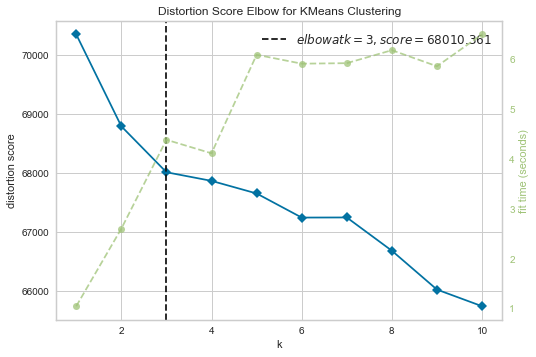

In [88]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(tf)
visualizer.show()

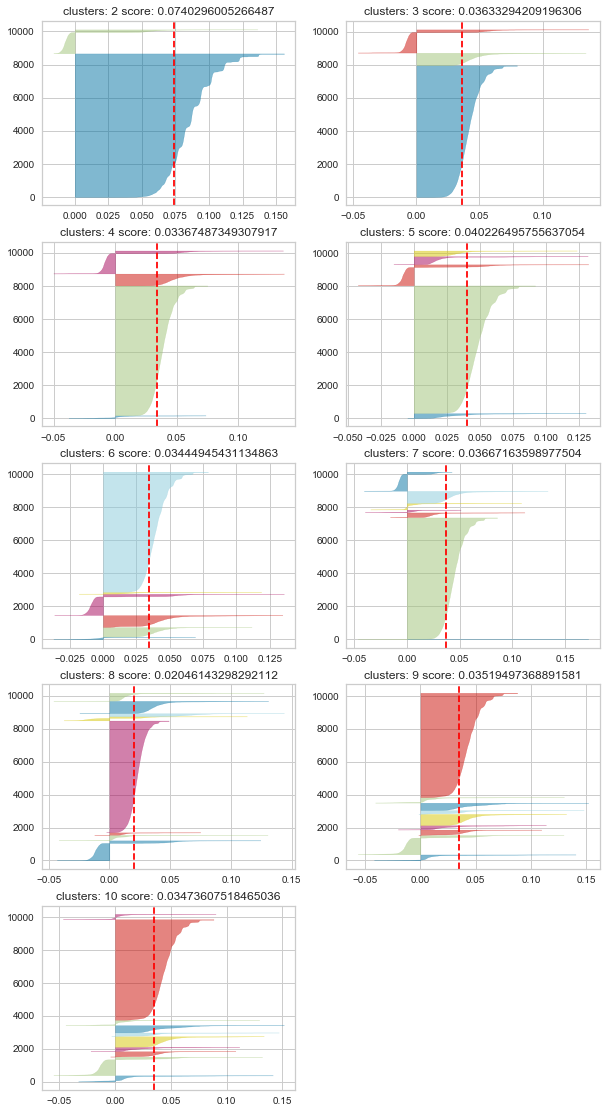

In [89]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 11):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(tf)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [90]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.0740296005266487),
 (5, 0.040226495755637054),
 (7, 0.03667163598977504),
 (3, 0.03633294209196306),
 (9, 0.03519497368891581),
 (10, 0.03473607518465036),
 (6, 0.03444945431134863),
 (4, 0.03367487349307917),
 (8, 0.02046143298292112)]

It's not that simple to choose the best number of clusters now as the situation has become more perplexed here. Most probably we would go for either 3 or 5 clusters.

## Classification

In [91]:
tfidfconverter = TfidfTransformer()
tf = tfidfconverter.fit_transform(tf)
X = tfidfconverter.fit_transform(X).toarray()

In [92]:
cl_text = cleaned_tweets.loc[:, ['tweetText']]
cl_groupId = cleaned_tweets.loc[:, ['origMepGroupId']]
y = cl_groupId['origMepGroupId'].to_numpy()
y

array([6, 1, 1, ..., 1, 1, 5], dtype=int64)

In [93]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.54609562, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.44140885, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [96]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
print(accuracy_score(y_test, y_pred))

0.5485148514851486


In [99]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0)
randomForest_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
randomForest_scores

array([0.54374691, 0.54280059, 0.52053439, 0.50669311, 0.51908775])

In [100]:
mnb_clf = MultinomialNB().fit(X_train, y_train)
y_pred = mnb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5668316831683168


In [101]:
sdg_clf = Pipeline([('sdg_clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3,
                                           random_state=42))
                    ])


sdg_clf.fit(X_train, y_train)
y_pred = sdg_clf.predict(X_test)
np.mean(y_pred == y_test) 

0.5668316831683168

In [102]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.mean(y_pred == y_test)

0.4900990099009901

In [162]:
svclassifier = SVC(gamma=0.001, C=100.)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
np.mean(y_pred == y_test)

0.5103960396039604

In [163]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
np.mean(y_pred == y_test)

0.18316831683168316

In [164]:
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    print(strategy)
    y_pred = dummy.predict(X_test)
    
    print(np.mean(y_pred == y_test))

stratified
0.16881188118811882
most_frequent
0.24108910891089108
prior
0.24108910891089108
uniform
0.13217821782178218


So we can see that overall all our results are slightly worse than before, which is something that we anticipated